####  In This notebook,  I want to show you how hyperparameters can affect the output of our deep learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Let's create a synthetic dataset

In [2]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples = [150, 120, 90, 100], 
                                         n_features = 2, 
                                         centers = [(6, 40), (4, 50), (6, 55), (4, 65)], 
                                         cluster_std = 3.3, random_state = 1123)
X

array([[ 6.87050933e+00,  3.51024800e+01],
       [ 7.60568673e+00,  5.26245235e+01],
       [ 8.13729164e+00,  5.29977076e+01],
       [ 8.45716234e+00,  5.13131686e+01],
       [ 8.39783255e+00,  4.49783922e+01],
       [ 6.88723128e+00,  6.57403022e+01],
       [ 6.61092033e+00,  4.96308894e+01],
       [ 1.32720939e+01,  4.07606994e+01],
       [ 2.35106144e-02,  4.98688487e+01],
       [ 4.96286020e+00,  4.27598497e+01],
       [ 2.77788302e+00,  6.57344913e+01],
       [ 7.89435606e+00,  4.88034297e+01],
       [ 5.50846087e+00,  3.97070807e+01],
       [ 9.01532439e+00,  3.67847810e+01],
       [-2.41791378e-01,  6.77791729e+01],
       [ 5.44804756e+00,  6.29962600e+01],
       [ 6.95250138e-01,  6.26937930e+01],
       [ 4.56616548e+00,  6.63396856e+01],
       [ 5.21327705e+00,  4.67978127e+01],
       [ 2.28384521e+00,  5.52724304e+01],
       [ 8.27987100e+00,  5.18779495e+01],
       [ 2.96058237e+00,  6.89139073e+01],
       [ 1.49307691e+00,  5.46649648e+01],
       [ 3.

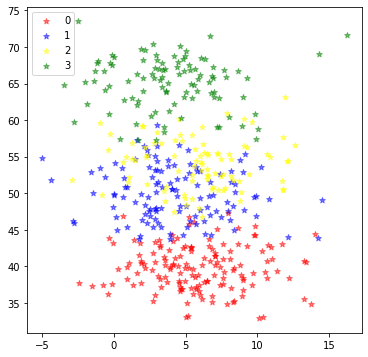

In [3]:
cdict = {0:'red', 1:'blue', 2:'yellow', 3:'green'}
plt.figure(figsize = (6, 6))
for i in np.unique(y):
    indices = np.where(y == i)
    plt.scatter(x = X[indices, 0], y = X[indices, 1], c = cdict[i], label = i, marker = '*', alpha = 0.5)
    
plt.legend()

In [4]:
y[np.where(y == 3)] = 0
y[np.where(y == 2)] = 1

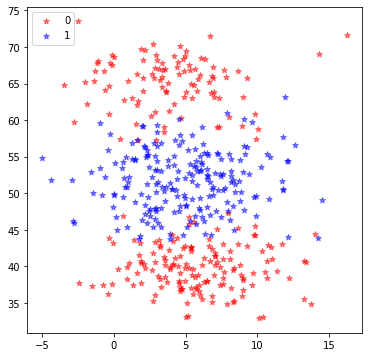

In [5]:
cdict = {0:'red', 1:'blue'}
plt.figure(figsize = (6, 6))
for i in np.unique(y):
    indices = np.where(y == i)
    plt.scatter(x = X[indices, 0], y = X[indices, 1], c = cdict[i], label = i, marker = '*', alpha = 0.5)
    
plt.legend()

##### first of all, I want to show you how sigmoid activation function(for hidden layers, not output layers) can affect your result

In [6]:
n_features = X.shape[1]
n_outcomes = len(np.unique(y))
print(n_features)
print(n_outcomes)

2
2


In [7]:
# Befor start the training loop, let normalize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

In [8]:
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

## Define Sallow Network

In [9]:
def shallow_net(feature, target, opt, loss, activation_function = 'sigmoid', n_epochs = 150, batch_size = 258, mean_weight_init = 0, sd_weight_init = 0.01):
    
    weight_initializer = tf.keras.initializers.RandomNormal(mean = mean_weight_init, stddev = sd_weight_init)
    # Define The Model Architecture
    model = Sequential()
    model.add(Dense(4, activation = activation_function, input_dim = n_features, kernel_initializer = weight_initializer))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = weight_initializer))
    
    model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])
    history = model.fit(feature, target, epochs = n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)
    return(history)

#### the shallow Network is something like this

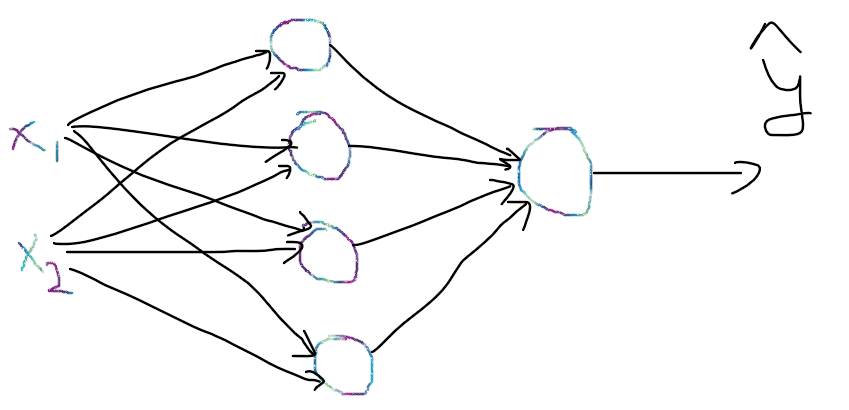

In [10]:
# Model 1: shallow Network/ Sigmoid Activation Function/Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model1 = shallow_net(features_scaled, y, opt, activation_function = 'sigmoid', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 62ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6854 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6915 - accuracy: 0.5417 - val_loss: 0.6861 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5376 - val_loss: 0.6854 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6895 - accuracy: 0.5585 - val_loss: 0.6888 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.5442 - val_loss: 0.6893 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6915 - accuracy: 0.5473 - val_loss: 0.6876 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5142 - val_loss: 0.6857 - val_accuracy: 0.6304
Epoch 8/250


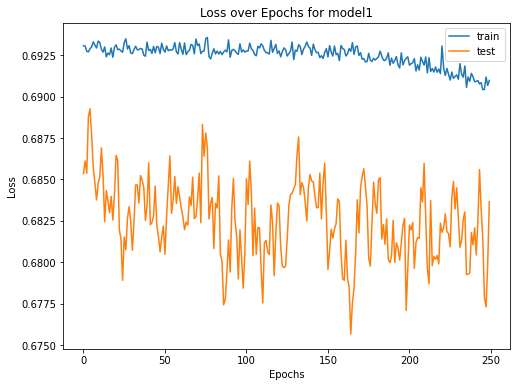

In [11]:
plt.figure(figsize = (8, 6))
plt.plot(model1.history['loss'], label = 'train')
plt.plot(model1.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model1')
plt.legend()

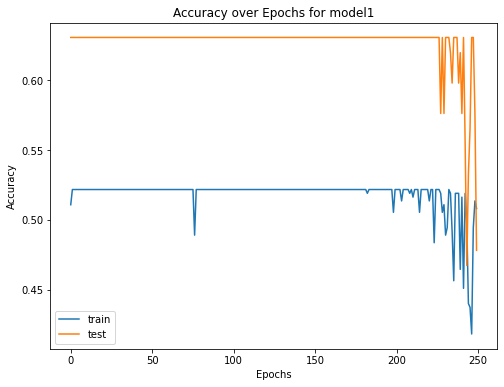

In [12]:
plt.figure(figsize = (8, 6))
plt.plot(model1.history['accuracy'], label = 'train')
plt.plot(model1.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model1')
plt.legend()

#### Why model1 can't converge? (think about it)
#### Let him more time(more epoch) mabay it hasn't enogh time to train on data

In [13]:
# Model 2: shallow Network/ Sigmoid Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 500/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model2 = shallow_net(features_scaled, y, opt, activation_function = 'sigmoid', n_epochs = 500, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/500
12/12 [==============================] - 1s 25ms/step - loss: 0.6937 - accuracy: 0.4717 - val_loss: 0.6854 - val_accuracy: 0.6304
Epoch 2/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.5219 - val_loss: 0.6852 - val_accuracy: 0.6304
Epoch 3/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5218 - val_loss: 0.6826 - val_accuracy: 0.6304
Epoch 4/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.5380 - val_loss: 0.6861 - val_accuracy: 0.6304
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5140 - val_loss: 0.6856 - val_accuracy: 0.6304
Epoch 6/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.4935 - val_loss: 0.6800 - val_accuracy: 0.6304
Epoch 7/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6948 - accuracy: 0.5054 - val_loss: 0.6798 - val_accuracy: 0.6304
Epoch 8/500


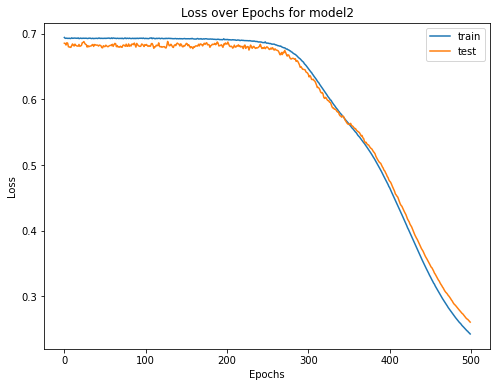

In [14]:
plt.figure(figsize = (8, 6))
plt.plot(model2.history['loss'], label = 'train')
plt.plot(model2.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model2')
plt.legend()

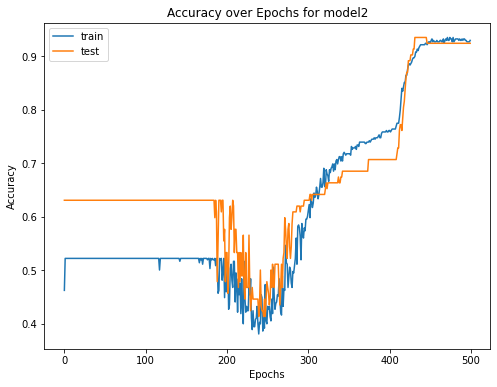

In [15]:
plt.figure(figsize = (8, 6))
plt.plot(model2.history['accuracy'], label = 'train')
plt.plot(model2.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model2')
plt.legend()

In [16]:
# It seems that our model does not have enough time to train let him more time again
# Model 3: shallow Network/ Sigmoid Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 1000/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model3 = shallow_net(features_scaled, y, opt, activation_function = 'sigmoid', n_epochs = 1000, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/1000
12/12 [==============================] - 1s 27ms/step - loss: 0.6936 - accuracy: 0.4650 - val_loss: 0.6869 - val_accuracy: 0.6304
Epoch 2/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5373 - val_loss: 0.6867 - val_accuracy: 0.6304
Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5290 - val_loss: 0.6862 - val_accuracy: 0.6304
Epoch 4/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.6917 - accuracy: 0.5346 - val_loss: 0.6894 - val_accuracy: 0.6304
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.5240 - val_loss: 0.6886 - val_accuracy: 0.6304
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.5171 - val_loss: 0.6871 - val_accuracy: 0.6304
Epoch 7/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5291 - val_loss: 0.6856 - val_accuracy: 0.6304
Epoc

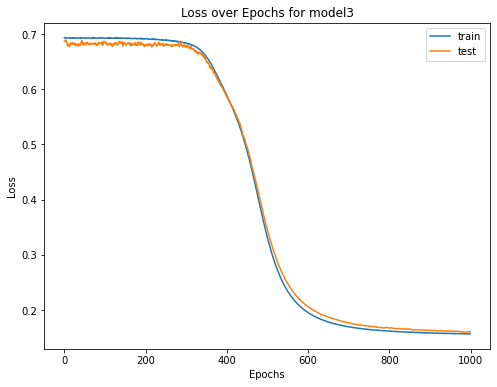

In [17]:
plt.figure(figsize = (8, 6))
plt.plot(model3.history['loss'], label = 'train')
plt.plot(model3.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model3')
plt.legend()

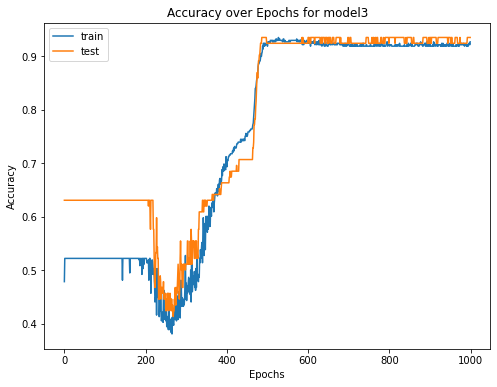

In [18]:
plt.figure(figsize = (8, 6))
plt.plot(model3.history['accuracy'], label = 'train')
plt.plot(model3.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model3')
plt.legend()

In [19]:
# Ok, with 500 epochs, our model fit good
# But let me change the learning Rate to 0.3 and n_epochs to 250

# Model 4: shallow Network/ Sigmoid Activation Function/ Learning Rate: 0.3/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.3)
model4 = shallow_net(features_scaled, y, opt, activation_function = 'sigmoid', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 25ms/step - loss: 0.6967 - accuracy: 0.4028 - val_loss: 0.6799 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6937 - accuracy: 0.5200 - val_loss: 0.6794 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6935 - accuracy: 0.5083 - val_loss: 0.6691 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.7011 - accuracy: 0.4917 - val_loss: 0.6751 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.5206 - val_loss: 0.6871 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5378 - val_loss: 0.6932 - val_accuracy: 0.3696
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.5225 - val_loss: 0.6928 - val_accuracy: 0.6304
Epoch 8/250


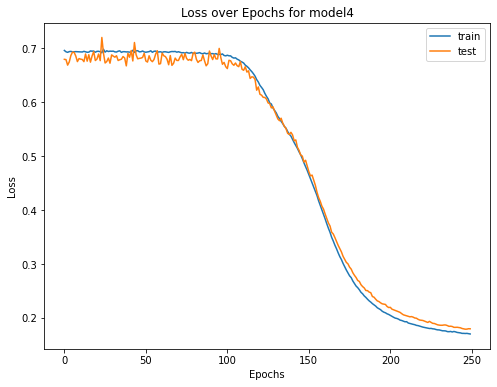

In [20]:
plt.figure(figsize = (8, 6))
plt.plot(model4.history['loss'], label = 'train')
plt.plot(model4.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model4')
plt.legend()

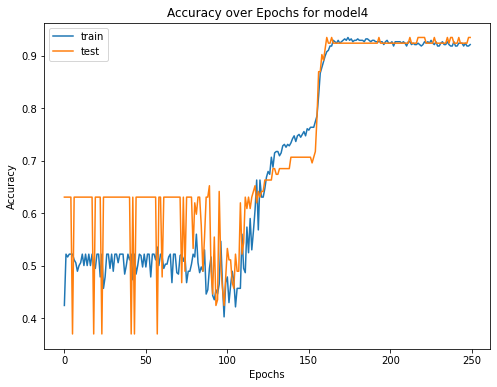

In [21]:
plt.figure(figsize = (8, 6))
plt.plot(model4.history['accuracy'], label = 'train')
plt.plot(model4.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model4')
plt.legend()

In [22]:
# what's happend? 
# suddenly loss decrese 
# It seems that model need to forced bigger learning rate rather than a small learning rate

# Change the activation function, I want to use the hyperbolic tangant

In [23]:
# Model 5: shallow Network/ tanh Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model5 = shallow_net(features_scaled, y, opt, activation_function = 'tanh', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 26ms/step - loss: 0.6932 - accuracy: 0.5160 - val_loss: 0.6885 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5253 - val_loss: 0.6867 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.5236 - val_loss: 0.6851 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.5613 - val_loss: 0.6845 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5265 - val_loss: 0.6842 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.5225 - val_loss: 0.6848 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6941 - accuracy: 0.4954 - val_loss: 0.6831 - val_accuracy: 0.6304
Epoch 8/250


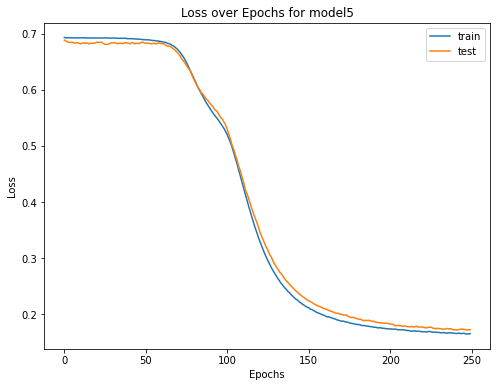

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(model5.history['loss'], label = 'train')
plt.plot(model5.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model5')
plt.legend()

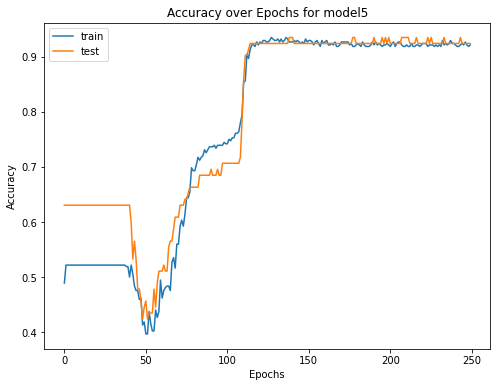

In [25]:
plt.figure(figsize = (8, 6))
plt.plot(model5.history['accuracy'], label = 'train')
plt.plot(model5.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model5')
plt.legend()

In [26]:
# With about 100 epochs we get acceptable result.

### Rlue activation function

In [27]:
# Model 6: shallow Network/ Relu Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model6 = shallow_net(features_scaled, y, opt, activation_function = 'relu', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 26ms/step - loss: 0.6929 - accuracy: 0.4986 - val_loss: 0.6915 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.5308 - val_loss: 0.6902 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5281 - val_loss: 0.6878 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6935 - accuracy: 0.5026 - val_loss: 0.6861 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6941 - accuracy: 0.4943 - val_loss: 0.6853 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6908 - accuracy: 0.5442 - val_loss: 0.6842 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5127 - val_loss: 0.6834 - val_accuracy: 0.6304
Epoch 8/250


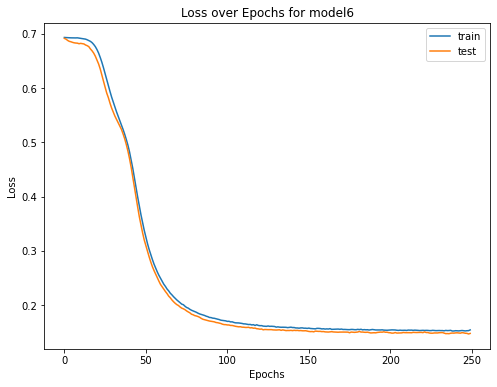

In [28]:
plt.figure(figsize = (8, 6))
plt.plot(model6.history['loss'], label = 'train')
plt.plot(model6.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model6')
plt.legend()

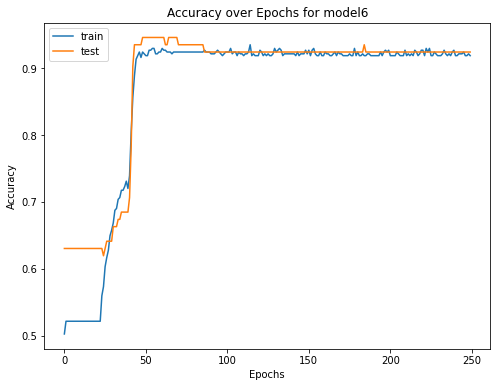

In [29]:
plt.figure(figsize = (8, 6))
plt.plot(model6.history['accuracy'], label = 'train')
plt.plot(model6.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model6')
plt.legend()

In [30]:
# when we use relu activation function, our model converge verey fast

### Softsign acitvation function

In [31]:
# Model 7: shallow Network/ softsign Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model7 = shallow_net(features_scaled, y, opt, activation_function = 'softsign', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 25ms/step - loss: 0.6933 - accuracy: 0.4822 - val_loss: 0.6901 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.4588 - val_loss: 0.6868 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6950 - accuracy: 0.4682 - val_loss: 0.6849 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5274 - val_loss: 0.6838 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.5360 - val_loss: 0.6837 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5161 - val_loss: 0.6829 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.5380 - val_loss: 0.6831 - val_accuracy: 0.6304
Epoch 8/250


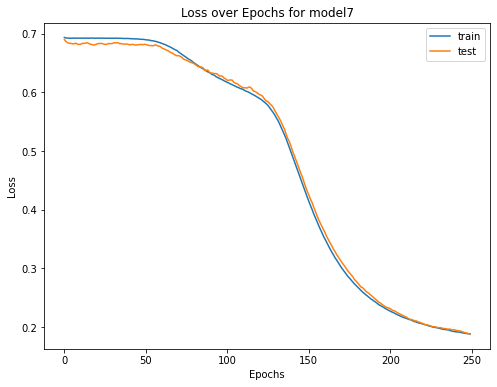

In [32]:
plt.figure(figsize = (8, 6))
plt.plot(model7.history['loss'], label = 'train')
plt.plot(model7.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model7')
plt.legend()

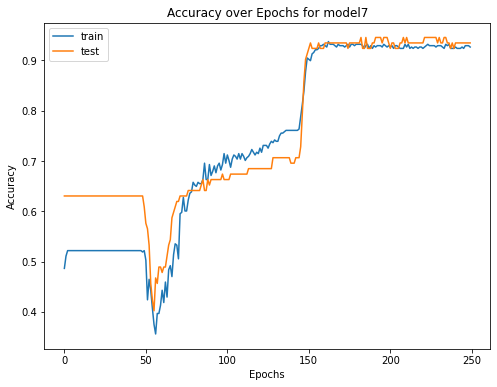

In [33]:
plt.figure(figsize = (8, 6))
plt.plot(model7.history['accuracy'], label = 'train')
plt.plot(model7.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model7')
plt.legend()

## selu activation function

In [34]:
# Model 8: shallow Network/ selu Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model8 = shallow_net(features_scaled, y, opt, activation_function = 'selu', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 25ms/step - loss: 0.6935 - accuracy: 0.4354 - val_loss: 0.6901 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5391 - val_loss: 0.6886 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.5590 - val_loss: 0.6892 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5341 - val_loss: 0.6872 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6914 - accuracy: 0.5408 - val_loss: 0.6860 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.5642 - val_loss: 0.6860 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5119 - val_loss: 0.6856 - val_accuracy: 0.6304
Epoch 8/250


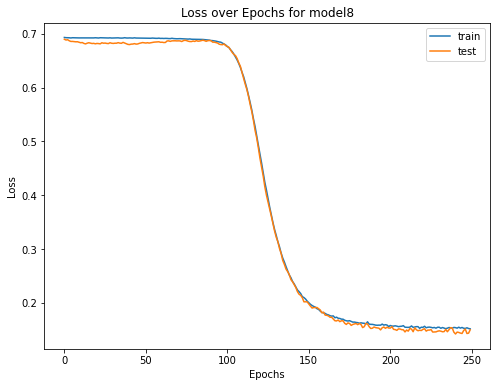

In [35]:
plt.figure(figsize = (8, 6))
plt.plot(model8.history['loss'], label = 'train')
plt.plot(model8.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model8')
plt.legend()

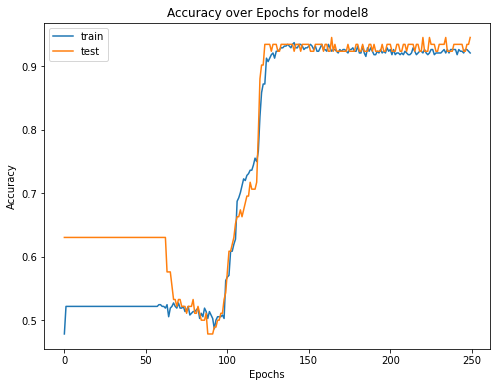

In [36]:
plt.figure(figsize = (8, 6))
plt.plot(model8.history['accuracy'], label = 'train')
plt.plot(model8.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model8')
plt.legend()

## elu activation function

In [37]:
# Model 9: shallow Network/ elu Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model9 = shallow_net(features_scaled, y, opt, activation_function = 'elu', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 25ms/step - loss: 0.6934 - accuracy: 0.4651 - val_loss: 0.6898 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5140 - val_loss: 0.6879 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.5239 - val_loss: 0.6855 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5313 - val_loss: 0.6844 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6942 - accuracy: 0.4993 - val_loss: 0.6822 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.5060 - val_loss: 0.6820 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5020 - val_loss: 0.6821 - val_accuracy: 0.6304
Epoch 8/250


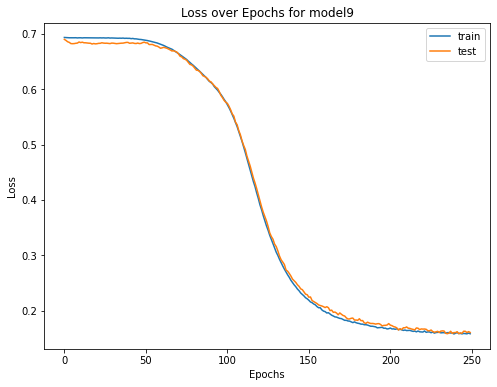

In [38]:
plt.figure(figsize = (8, 6))
plt.plot(model9.history['loss'], label = 'train')
plt.plot(model9.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model9')
plt.legend()

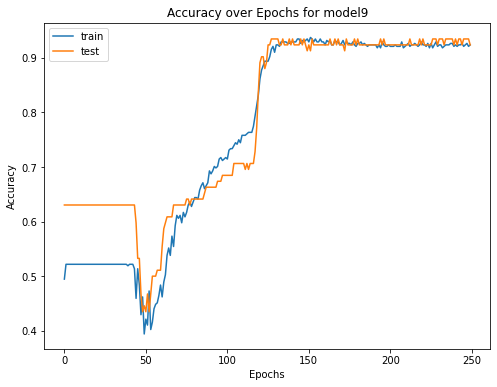

In [39]:
plt.figure(figsize = (8, 6))
plt.plot(model9.history['accuracy'], label = 'train')
plt.plot(model9.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model9')
plt.legend()

## exponential activation function

In [40]:
# Model 10: shallow Network/ exponential Activation Function/ Learning Rate: 0.1/ Scaled Features/ Epochs: 250/ Batch Size = 32
opt = keras.optimizers.SGD(learning_rate = 0.1)
model10 = shallow_net(features_scaled, y, opt, activation_function = 'exponential', n_epochs = 250, batch_size = 32, loss = 'binary_crossentropy')

Epoch 1/250
12/12 [==============================] - 1s 25ms/step - loss: 0.6946 - accuracy: 0.4941 - val_loss: 0.6841 - val_accuracy: 0.6304
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5389 - val_loss: 0.6879 - val_accuracy: 0.6304
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6938 - accuracy: 0.4868 - val_loss: 0.6842 - val_accuracy: 0.6304
Epoch 4/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5150 - val_loss: 0.6831 - val_accuracy: 0.6304
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5241 - val_loss: 0.6861 - val_accuracy: 0.6304
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6915 - accuracy: 0.5473 - val_loss: 0.6928 - val_accuracy: 0.6304
Epoch 7/250
12/12 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.5532 - val_loss: 0.6868 - val_accuracy: 0.6304
Epoch 8/250


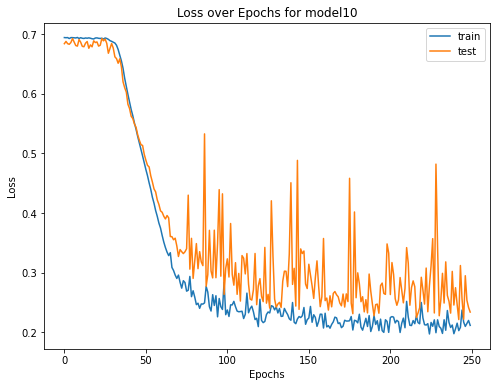

In [41]:
plt.figure(figsize = (8, 6))
plt.plot(model10.history['loss'], label = 'train')
plt.plot(model10.history['val_loss'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for model10')
plt.legend()

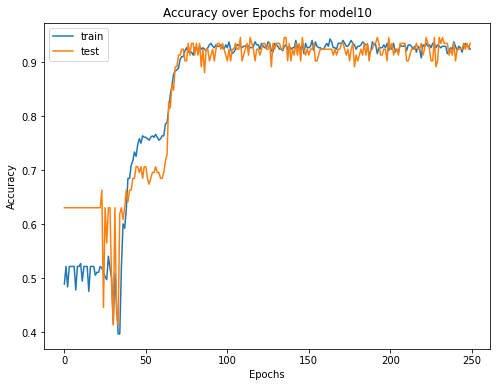

In [42]:
plt.figure(figsize = (8, 6))
plt.plot(model10.history['accuracy'], label = 'train')
plt.plot(model10.history['val_accuracy'], label = 'test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs for model10')
plt.legend()

In [43]:
# conclusion: 
# In this notebook, we change three important hyperparameters in the Neural Net. 
# It seems that the Relu activation function is the best in this dataset.